# Imports

In [217]:
import numpy as np
from numpy import *
import itertools
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time

import pixiedust

Defining Latex Macros. DO NOT DELETE THIS CELL
$\newcommand\p[2]{\frac{\partial #1}{\partial #2}}$

# Introduction

Consider the following $p$-Laplacian equation:

$$\Delta_p \Psi(x,y)= \sin(\pi  x)\\
\left(\frac{4. (0.5\, -1. y)^2 \sin ^2(\pi  x)}{\left(\pi ^2 (y-1)^2 y^2 \cos ^2(\pi  x)+(1-2 y)^2 \sin ^2(\pi  x)\right)^{1.25}}+\frac{9.8696 y^2-9.8696 y-2.}{\left(\pi ^2 (y-1)^2 y^2 \cos ^2(\pi  x)+(1-2 y)^2 \sin ^2(\pi  x)\right)^{0.25}}-\frac{48.7045 y \left(1. y^5-3. y^4+2.18943 y^3+0.621139 y^2-1.01321 y+0.202642\right) \cos ^2(\pi  x)}{\left(\pi ^2 (y-1)^2 y^2 \cos ^2(\pi  x)+(1-2 y)^2 \sin ^2(\pi  x)\right)^{1.25}}\right) $$

$x \in [0,1],\ y \in [0,1]$ with *Dirichlet* BC: $\Psi(0,y) = 0$, $\Psi(1,y) = 0$, $\Psi(x,0) = 0$ and $\Psi(x,1) = 0$.

For this case, we will take $p=1.5$.

$$\Delta_p \Psi(x,y) = f(x,y)$$

For $p=4$, $$ f(x,y) = \pi ^2 (y-1) y \left(3 \pi ^2 y^4-6 \pi ^2 y^3+3 \left(\pi ^2-6\right) y^2+18 y-4\right) \sin (\pi  x) \cos ^2(\pi  x)+\left(\pi ^2 (y-1) y-6\right) (1-2 y)^2 \sin ^3(\pi  x) $$

# Defining functions

In [2]:
#p=4
def f(x,y):
    return pi**2 * (y-1)*y*(3*pi**2 *y**4 - 6*pi**2 *y**3 + 3*(pi**2-6)*y**2 + 18*y -4) \
           * sin(pi*x)*cos(pi*x)**2 \
           + (pi**2*(y-1)*y - 6)*(1-2*y)**2 * sin(pi*x)**3

In [3]:
# #p=1.5
# def f(x, y):
#     term1 = ( 4*(0.5-y)**2 * np.sin(np.pi*x)**2 ) /\
#             ( (np.pi**2 * (y-1)**2 * y**2 * np.cos(np.pi*x)**2 + (1-2*y)**2 * np.sin(np.pi*x)**2)**1.25 )
    
#     term2 = ( 9.8696*y**2 - 9.8696*y - 2 ) /\
#             ( (np.pi**2 * (y-1)**2 * y**2 * np.cos(np.pi*x)**2 + (1-2*y)**2 * np.sin(np.pi*x)**2)**0.25 )
        
#     term3 = ( 48.7405*y*(y**5 - 3*y**4 + 2.18943*y**3 + 0.621139*y**2 - 1.01321*y + 0.202642)*np.cos(np.pi*x)**2 ) /\
#             ( (np.pi**2 * (y-1)**2 * y**2 * np.cos(np.pi*x)**2 + (1-2*y)**2 * np.sin(np.pi*x)**2)**1.25 )
    
#     return term1 + term2 - term3

In [4]:
# x, y = symbols('x y')

# expr  = ( 4*(0.5-y)**2 * sin(pi*x)**2 ) /\
#         ( (pi**2 * (y-1)**2 * y**2 * cos(pi*x)**2 + (1-2*y)**2 * sin(pi*x)**2)**1.25 ) +\
#         ( 9.8696*y**2 - 9.8696*y - 2 ) /\
#         ( (pi**2 * (y-1)**2 * y**2 * cos(pi*x)**2 + (1-2*y)**2 * sin(pi*x)**2)**0.25 ) -\
#         ( 48.7405*y*(y**5 - 3*y**4 + 2.18943*y**3 + 0.621139*y**2 - 1.01321*y + 0.202642)*cos(pi*x)**2 ) /\
#         ( (pi**2 * (y-1)**2 * y**2 * cos(pi*x)**2 + (1-2*y)**2 * sin(pi*x)**2)**1.25 )

# init_printing(latex_mode='equation')

# expr.subs([(x,0), (y,0)])

# limit(limit(expr, x,0), y, 0)

# limit(y*sin(x), (x,y), (0,0))

# f(1,1)

The analytic solution is given by: $\Psi_a(x,y) = y (1-y) \sin(\pi  x)$

In [5]:
def psi_a(x, y):
    return y * (1-y) * np.sin(np.pi * x)

In [6]:
# -π (y - 1) y cos(π x)
def psi_a_dx(x, y):
    return -np.pi*(y-1)*y*np.cos(np.pi*x)

In [7]:
# (1 - 2 y) sin(π x)
def psi_a_dy(x,y):
    return (1-2*y)*np.sin(np.pi*x)

Sigmoid $\sigma(x) = \frac{1}{1+e^{-x}}$ and its derrivatives.

In [8]:
#sigmoid
def sig(x):
    return 1 / (1 + np.exp(-x))

def sig1(x):
    return sig(x) * (1 - sig(x))

def sig2(x):
    return sig1(x) - 2 * sig(x) * sig1(x)

def sig3(x):
    return sig2(x) - 2 * (sig1(x)**2 + sig(x) * sig2(x))

def sig_pr(x, k):
    if k==0:
        return sig(x)
    if k==1:
        return sig1(x)
    if k==2:
        return sig2(x)
    if k==3:
        return sig3(x)

## Neural network and its derivatives

The output of neural network $N(x,y,\vec{p})$, where $\vec{p} = [w, u, v]$:
$$N = \sum_i^H v_i \sigma(z_i) \text{, where } z_i = w_{i0} x + w_{i1} y + u_i$$

In [9]:
def z(x, y, p):
    z_x = np.multiply(x, p[0][0])
    z_y = np.multiply(y, p[0][1])
    z_ = np.array([z_x, z_y, p[1]]).sum(axis=0)
    return z_

def N(x, y, p):
    return np.sum(np.multiply(sig(z(x,y,p)), p[2]))

$$\p{^k N}{ x_j^k} = \sum_{i=1}^H v_i w_{ij}^k \sigma^{(k)}$$

In [10]:
def dN_dxj_k(x, y, p, j, k):
    wj = p[0][j]
    v = p[2]
    z_ = z(x, y, p)
    
    return np.sum(v * (wj**k) * sig_pr(z_, k))

$$\p{}{ x_1}\p{}{ x_2} N = \sum_{i=1}^H v_i w_{i1} w_{i2} \sigma''$$

In [11]:
def dN_dx1_dx2(x, y, p):
    w1 = p[0][0]
    w2 = p[0][1]
    v = p[2]
    z_ = z(x, y, p)

    return np.sum(v * w1 * w2 * sig_pr(z_, 2))

$$\p{N}{w_j} = x_j v \sigma '$$

In [12]:
def dN_dwj(x, y, p, j):
    xj = x if j==0 else y
    v = p[2]
    z_ = z(x, y, p)
    return xj * v * sig1(z_)

$$ \p{}{ w_j} \p{ N}{ x_k} = x_j v w_k \sigma'' + v_i \sigma' \quad\text{ if } j = k$$

$$ \p{}{ w_j} \p{ N}{ x_k} = x_j v w_k \sigma'' \quad\text{ if } j \neq k$$

In [13]:
def d_dwj_dN_dxk(x, y, p, j, k):
    xj = x if j==0 else y
    wk = p[0][k]
    jk = 1 if j==k else 0
    v = p[2]
    z_ = z(x, y, p)
    return xj * v * wk * sig2(z_) + jk * v * sig1(z_)

$$ \p{}{ w_j} \p{^2 N}{ x_k^2} = x_j v w_k^2 \sigma^{(3)} + 2 v w_k \sigma'' \quad\text{ if } j = k $$

$$ \p{}{ w_j} \p{^2 N}{ x_k^2} = x_j v w_k^2 \sigma^{(3)} \quad\text{ if } j \neq k $$

In [14]:
def d_dwj_dN2_dxk2(x, y, p, j, k):
    xj = x if j==0 else y
    wk = p[0][k]
    jk = 1 if j==k else 0
    v = p[2]
    z_ = z(x, y, p)
    return xj * v * (wk**2) * sig3(z_) + jk * 2 * v * wk * sig2(z_)

$$ \p{}{ w_j}\p{}{ x_1}\p{}{ x_2} N = x_j v w_1 w_2 \sigma^{(3)} + v w_{not j} \sigma'' $$

In [15]:
def d_dwj_d_dx1_dN_dx2(x, y, p, j):
    w1 = p[0][0]
    w2 = p[0][1]
    w_not_j = p[0][1-j]
    xj = x if j==0 else y
    v = p[2]
    z_ = z(x, y, p)
    
    return xj*v*w1*w2*sig_pr(z_,3) + v*w_not_j*sig_pr(z_, 2)

$$ \p{}{u}\p{}{x_1}\p{}{x_2} N = v w_1 w_2 \sigma^{(3)}$$

In [16]:
def d_du_d_dx1_dN_dx2(x, y, p):
    w1 = p[0][0]
    w2 = p[0][1]
    v = p[2]
    z_ = z(x, y, p)
    
    return v*w1*w2*sig_pr(z_, 3)

$$ \p{}{v}\p{}{x_1}\p{}{x_2} N = w_1 w_2 \sigma''$$

In [17]:
def d_dv_d_dx1_dN_dx2(x, y, p):
    w1 = p[0][0]
    w2 = p[0][1]
    z_ = z(x, y, p)
    
    return w1*w2*sig_pr(z_, 2)

$$ \p{}{ u} \p{^k}{ x_j^k} N = v w_j^k \sigma^{(k+1)} $$

In [18]:
def d_du_dkN(x, y, p, j, k):
    v = p[2]
    wj = p[0][j]
    z_ = z(x, y, p)
    return v * (wj**k) * sig_pr(z_, k+1)

$$ \p{}{ v} \p{^k}{ x_j^k} N = w_j^k \sigma^{(k)} $$

In [19]:
def d_dv_dkN(x, y, p, j, k):
    wj = p[0][j]
    z_ = z(x, y, p)
    return (wj**k) * sig_pr(z_, k)

## Trial solution and its derivatives

The trial solution is given by: $$\Psi_t(x,y) = x(1-x)y(1-y)N(x,y,\vec{p})$$

In [20]:
def psi_t(x, y, p):
    return x * (1-x) * y * (1-y) * N(x, y, p)

$$\p{\Psi_t}{w_j} = x(1-x)y(1-y)\p{N}{w_j}$$

In [21]:
def dPsi_dwj(x, y, p, j):
    return x * (1-x) * y * (1-y) * dN_dwj(x, y, p, j)

$$\p{\Psi_t}{u} = x(1-x)y(1-y)\p{N}{u}$$

In [22]:
def dPsi_du(x, y, p):
    return x * (1-x) * y * (1-y) * d_du_dkN(x, y, p, 0, 0)

$$\p{\Psi_t}{v} = x(1-x)y(1-y)\p{N}{v}$$

In [23]:
def dPsi_dv(x, y, p):
    return x * (1-x) * y * (1-y) * d_dv_dkN(x, y, p, 0, 0)

$$\p{\Psi_t}{x_j} = y_j(1-y_j)\left[ (1-2x_j)N + x_j(1-x_j) \p{N}{x_j} \right]$$

In [24]:
def dPsi_dxj(x, y, p, j):
    xj = x if j==0 else y
    yj = y if j==0 else x
    return yj*(1-yj)*( (1-2*xj)*N(x,y,p) + xj*(1-xj)*dN_dxj_k(x,y,p,j,1) )

$$\p{^2 \Psi_t}{ x_j^2} = y_j(1-y_j)\left[ -2N + (2-4x_j) \p{ N}{ x_j} + x_j (1-x_j) \p{^2 N}{ x_j^2} \right]$$

In [25]:
def dPsi2_dxj2(x, y, p, j):
    xj = x if j==0 else y
    yj = y if j==0 else x
    return yj*(1-yj)*(-2*N(x,y,p) + (2-4*xj)*dN_dxj_k(x,y,p,j,1) + xj*(1-xj)*dN_dxj_k(x,y,p,j,2))

$$\p{}{ y_j}\p{ \Psi_t}{ x_j} = (1-2y_j)\left[ (1-2x_j)N + x_j(1-x_j) \p{ N}{ x_j}\right] + y_j(1-y_j) \left[ (1-2x_j)\p{ N}{ y_j} + x_j(1-x_j) \p{}{ y_j} \p{ N}{ x_j} \right] $$

In [26]:
def d_dy_dPsi_dx(x, y, p, j):
    xj = x if j==0 else y
    yj = y if j==0 else x
    return (1-2*yj)*( (1-2*xj)*N(x,y,p) + xj*(1-xj)*dN_dxj_k(x,y,p,j,1) )  +  yj*(1-yj)*((1-2*xj)*dN_dxj_k(x,y,p,1-j,1) + xj*(1-xj)*dN_dx1_dx2(x,y,p))

$$ |\nabla \Psi| = \left[ \left(\p{\Psi}{x}\right)^2 + \left(\p{\Psi}{y}\right)^2 \right]^{\frac{1}{2}} $$

In [27]:
def norm_psi(x, y, p):
    return np.sqrt(dPsi_dxj(x,y,p,0)**2 + dPsi_dxj(x,y,p,1)**2)

$$\p{}{x_j}|\nabla \Psi|^{p-2} = (p-2) |\nabla \Psi|^{p-4} \left(\p{\Psi}{x_j} \p{^2 \Psi}{x_j^2} + \p{\Psi}{y_j} \left( \p{}{x_j} \p{\Psi}{y_j} \right) \right)$$

In [28]:
def dNormPsi_dxj(x, y, p, j, pLap):
    return (pLap-2)*(norm_psi(x,y,p)**(pLap-4))*( dPsi_dxj(x,y,p,j)*dPsi2_dxj2(x,y,p,j) + dPsi_dxj(x,y,p,1-j)* d_dy_dPsi_dx(x,y,p,1-j))

$$\p{}{ w_j} \p{ \Psi_t}{ x_k} = y_k(1-y_k)\left[ (1-2x)\p{ N}{ w_j} + x(1-x) \p{}{ w_j} \p{ N}{ x_k} \right]$$

In [29]:
def d_dwj_dPsi_dxk(x, y, p, j, k):
    xj = x if k==0 else y
    yj = y if k==0 else x
    return yj*(1-yj)*( (1-2*xj)*dN_dwj(x,y,p,j) + xj*(1-xj)*d_dwj_dN_dxk(x,y,p,j,k) )

$$\p{}{ u} \p{ \Psi_t}{ x_k} = y_k(1-y_k)\left[ (1-2x)\p{ N}{ u} + x(1-x) \p{}{ u} \p{ N}{ x_k} \right]$$

In [30]:
def d_du_dPsi_dxk(x, y, p, k):
    xj = x if k==0 else y
    yj = y if k==0 else x
    return yj*(1-yj)*( (1-2*xj)*d_du_dkN(x,y,p,k,0) + xj*(1-xj)*d_du_dkN(x,y,p,k,1) )

$$\p{}{v} \p{ \Psi_t}{ x_k} = y_k(1-y_k)\left[ (1-2x)\p{ N}{v} + x(1-x) \p{}{v} \p{ N}{ x_k} \right]$$

In [31]:
def d_dv_dPsi_dxk(x, y, p, k):
    xj = x if k==0 else y
    yj = y if k==0 else x
    return yj*(1-yj)*( (1-2*xj)*d_dv_dkN(x,y,p,k,0) + xj*(1-xj)*d_dv_dkN(x,y,p,k,1) )

$$ \p{}{ w_j} \p{^2 \Psi_t}{ x_k^2} = y_k(1-y_k)\left[ -2 \p{ N}{ w_j} + (2-4x_k) \p{}{ w_j}\p{ N}{ x_k} + x_k (1-x_k) \p{}{ w_j}\p{^2 N}{ x_k^2} \right]$$

In [32]:
def d_dwj_dPsi2_dxk2(x, y, p, j, k):
    xk = x if k==0 else y
    yk = y if k==0 else x
    return yk*(1-yk)*(-2*dN_dwj(x,y,p,j) + (2-4*xk)*d_dwj_dN_dxk(x,y,p,j,k) + xk*(1-xk)*d_dwj_dN2_dxk2(x,y,p,j,k))

$$ \p{}{ u} \p{^2 \Psi_t}{ x_k^2} = y_k(1-y_k)\left[ -2 \p{ N}{ u} + (2-4x_k) \p{}{ u}\p{ N}{ x_k} + x_k (1-x_k) \p{}{ u}\p{^2 N}{ x_k^2} \right]$$

In [33]:
def d_du_dPsi2_dxk2(x, y, p, k):
    xk = x if k==0 else y
    yk = y if k==0 else x
    return yk*(1-yk)*(-2*d_du_dkN(x,y,p,k,0) + (2-4*xk)*d_du_dkN(x,y,p,k,1) + xk*(1-xk)*d_du_dkN(x,y,p,k,2))

$$ \p{}{v} \p{^2 \Psi_t}{ x_k^2} = y_k(1-y_k)\left[ -2 \p{ N}{v} + (2-4x_k) \p{}{v}\p{ N}{ x_k} + x_k (1-x_k) \p{}{v}\p{^2 N}{ x_k^2} \right]$$

In [34]:
def d_dv_dPsi2_dxk2(x, y, p, k):
    xk = x if k==0 else y
    yk = y if k==0 else x
    return yk*(1-yk)*(-2*d_dv_dkN(x,y,p,k,0) + (2-4*xk)*d_dv_dkN(x,y,p,k,1) + xk*(1-xk)*d_dv_dkN(x,y,p,k,2))

$$\p{}{ w_j}|\nabla \Psi|^{P} = (P) |\nabla \Psi|^{P-2} \left[\p{ \Psi}{ x} \left(\p{}{ w_j}\p{ \Psi}{ x}\right) + \p{ \Psi}{ y} \left(\p{}{ w_j}\p{ \Psi}{ y}\right) \right]$$

In [35]:
def dNormPsiP_dwj(x, y, p, j, P):
    return P*norm_psi(x,y,p)**(P-2)*(dPsi_dxj(x,y,p,0)*d_dwj_dPsi_dxk(x,y,p,j,0) + dPsi_dxj(x,y,p,1)*d_dwj_dPsi_dxk(x,y,p,j,1))

$$\p{}{ u}|\nabla \Psi|^{P} = (P) |\nabla \Psi|^{P-2} \left[\p{ \Psi}{ x} \left(\p{}{ u}\p{ \Psi}{ x}\right) + \p{ \Psi}{ y} \left(\p{}{ u}\p{ \Psi}{ y}\right) \right]$$

In [36]:
def dNormPsiP_du(x, y, p, P):
    return P*norm_psi(x,y,p)**(P-2)*(dPsi_dxj(x,y,p,0)*d_du_dPsi_dxk(x,y,p,0) + dPsi_dxj(x,y,p,1)*d_du_dPsi_dxk(x,y,p,1))

$$\p{}{v}|\nabla \Psi|^{P} = (P) |\nabla \Psi|^{P-2} \left[\p{ \Psi}{ x} \left(\p{}{v}\p{ \Psi}{ x}\right) + \p{ \Psi}{ y} \left(\p{}{v}\p{ \Psi}{ y}\right) \right]$$

In [37]:
def dNormPsiP_dv(x, y, p, P):
    return P*norm_psi(x,y,p)**(P-2)*(dPsi_dxj(x,y,p,0)*d_dv_dPsi_dxk(x,y,p,0) + dPsi_dxj(x,y,p,1)*d_dv_dPsi_dxk(x,y,p,1))

$$ \p{}{ w_j}\p{}{ y_k}\p{ \Psi_t}{ x_k} = (1-2y_k)\left[ (1-2x_k) \p{ N}{ w_j} + x_k(1-x_k) \p{}{ w_j}\p{ N}{ x_k}\right] + y_k(1-y_k) \left[ (1-2x_k)\p{}{ w_j}\p{ N}{ y_k} + x_k(1-x_k) \p{}{ w_j}\p{}{ y_k} \p{ N}{ x_k} \right] $$

In [38]:
def d_dwj_d_dyk_dPsi_dxk(x, y, p, j, k):
    xk = x if k==0 else y
    yk = y if k==0 else x
    term1 = (1-2*yk)*((1-2*xk)*dN_dwj(x,y,p,j) + xk*(1-xk)*d_dwj_dN_dxk(x,y,p,j,k))
    term2 = yk*(1-yk)*((1-2*xk)*d_dwj_dN_dxk(x,y,p,j,1-k) + xk*(1-xk)*d_dwj_d_dx1_dN_dx2(x,y,p,j))
    
    return term1 + term2

$$ \p{}{ u}\p{}{ y_k}\p{ \Psi_t}{ x_k} = (1-2y_k)\left[ (1-2x_k) \p{ N}{ u} + x_k(1-x_k) \p{}{ u}\p{ N}{ x_k}\right] + y_k(1-y_k) \left[ (1-2x_k)\p{}{ u}\p{ N}{ y_k} + x_k(1-x_k) \p{}{ u}\p{}{ y_k} \p{ N}{ x_k} \right] $$

In [39]:
def d_du_d_dyk_dPsi_dxk(x, y, p, k):
    xk = x if k==0 else y
    yk = y if k==0 else x
    term1 = (1-2*yk)*((1-2*xk)*d_du_dkN(x,y,p,k,0) + xk*(1-xk)*d_du_dkN(x,y,p,k,1))
    term2 = yk*(1-yk)*((1-2*xk)*d_du_dkN(x,y,p,1-k,1) + xk*(1-xk)*d_du_d_dx1_dN_dx2(x,y,p))
    
    return term1 + term2

$$ \p{}{v}\p{}{ y_k}\p{ \Psi_t}{ x_k} = (1-2y_k)\left[ (1-2x_k) \p{ N}{v} + x_k(1-x_k) \p{}{v}\p{ N}{ x_k}\right] + y_k(1-y_k) \left[ (1-2x_k)\p{}{v}\p{ N}{ y_k} + x_k(1-x_k) \p{}{v}\p{}{ y_k} \p{ N}{ x_k} \right] $$

In [40]:
def d_dv_d_dyk_dPsi_dxk(x, y, p, k):
    xk = x if k==0 else y
    yk = y if k==0 else x
    term1 = (1-2*yk)*((1-2*xk)*d_dv_dkN(x,y,p,k,0) + xk*(1-xk)*d_dv_dkN(x,y,p,k,1))
    term2 = yk*(1-yk)*((1-2*xk)*d_dv_dkN(x,y,p,1-k,1) + xk*(1-xk)*d_dv_d_dx1_dN_dx2(x,y,p))
    
    return term1 + term2

$$ \p{}{w_j} \left(\p{\Psi}{x_k} \p{^2 \Psi}{x_k^2} + \p{\Psi}{y_k} \left( \p{}{x_k} \p{\Psi}{y_k} \right) \right) = \left(\p{}{w_j}\p{\Psi}{x_k}\right) \p{^2\Psi}{x_k^2} + \p{\Psi}{x_k} \left(\p{}{w_j}\p{^2\Psi}{x_k^2}\right) + \left(\p{}{w_j}\p{\Psi}{y_k}\right) \left( \p{}{x_k}\p{\Psi}{y_k} \right) + \p{\Psi}{y_k}\left( \p{}{w_j}\p{}{x_k}\p{\Psi}{y_k} \right) $$

In [41]:
def d_dwj_bracket_k(x, y, p, j, k):
    term1 = d_dwj_dPsi_dxk(x,y,p,j,k) * dPsi2_dxj2(x,y,p,k)
    term2 = dPsi_dxj(x,y,p,k) * d_dwj_dPsi2_dxk2(x,y,p,j,k)
    term3 = d_dwj_dPsi_dxk(x,y,p,j,1-k) * d_dy_dPsi_dx(x,y,p,1-k)
    term4 = dPsi_dxj(x,y,p,1-k) * d_dwj_d_dyk_dPsi_dxk(x,y,p,j,1-k)
    
    return term1 + term2 + term3 + term4

$$ \p{}{u} \left(\p{\Psi}{x_k} \p{^2 \Psi}{x_k^2} + \p{\Psi}{y_k} \left( \p{}{x_k} \p{\Psi}{y_k} \right) \right) = \left(\p{}{u}\p{\Psi}{x_k}\right) \p{^2\Psi}{x_k^2} + \p{\Psi}{x_k} \left(\p{}{u}\p{^2\Psi}{x_k^2}\right) + \left(\p{}{u}\p{\Psi}{y_k}\right) \left( \p{}{x_k}\p{\Psi}{y_k} \right) + \p{\Psi}{y_k}\left( \p{}{u}\p{}{x_k}\p{\Psi}{y_k} \right) $$

In [42]:
def d_du_bracket_k(x, y, p, k):
    term1 = d_du_dPsi_dxk(x,y,p,k) * dPsi2_dxj2(x,y,p,k)
    term2 = dPsi_dxj(x,y,p,k) * d_du_dPsi2_dxk2(x,y,p,k)
    term3 = d_du_dPsi_dxk(x,y,p,1-k) * d_dy_dPsi_dx(x,y,p,1-k)
    term4 = dPsi_dxj(x,y,p,1-k) * d_du_d_dyk_dPsi_dxk(x,y,p,1-k)
    
    return term1 + term2 + term3 + term4

$$ \p{}{v} \left(\p{\Psi}{x_k} \p{^2 \Psi}{x_k^2} + \p{\Psi}{y_k} \left( \p{}{x_k} \p{\Psi}{y_k} \right) \right) = \left(\p{}{v}\p{\Psi}{x_k}\right) \p{^2\Psi}{x_k^2} + \p{\Psi}{x_k} \left(\p{}{v}\p{^2\Psi}{x_k^2}\right) + \left(\p{}{v}\p{\Psi}{y_k}\right) \left( \p{}{x_k}\p{\Psi}{y_k} \right) + \p{\Psi}{y_k}\left( \p{}{v}\p{}{x_k}\p{\Psi}{y_k} \right) $$

In [43]:
def d_dv_bracket_k(x, y, p, k):
    term1 = d_dv_dPsi_dxk(x,y,p,k) * dPsi2_dxj2(x,y,p,k)
    term2 = dPsi_dxj(x,y,p,k) * d_dv_dPsi2_dxk2(x,y,p,k)
    term3 = d_dv_dPsi_dxk(x,y,p,1-k) * d_dy_dPsi_dx(x,y,p,1-k)
    term4 = dPsi_dxj(x,y,p,1-k) * d_dv_d_dyk_dPsi_dxk(x,y,p,1-k)
    
    return term1 + term2 + term3 + term4

$$ \p{}{w_j}\p{}{x_k}|\nabla \Psi|^{p-2} = (p-2)\left[ \p{}{w_j}|\nabla \Psi|^{p-4} \left(\p{\Psi}{x_k} \p{^2 \Psi}{x_k^2} + \p{\Psi}{y_k} \left( \p{}{x_k} \p{\Psi}{y_k} \right) \right)  +  |\nabla \Psi|^{p-4} \p{}{w_j} \left(\p{\Psi}{x_k} \p{^2 \Psi}{x_k^2} + \p{\Psi}{y_k} \left( \p{}{x_k} \p{\Psi}{y_k} \right) \right) \right] $$

In [44]:
def d_dwj_dNormPsi_dxk(x, y, p, j, k, pLap):
    term1 = dNormPsiP_dwj(x,y,p,j,pLap-4) * (dPsi_dxj(x,y,p,k)*dPsi2_dxj2(x,y,p,k) + dPsi_dxj(x,y,p,1-k)*d_dy_dPsi_dx(x,y,p,1-k))
    term2 = norm_psi(x,y,p)**(pLap-4) * d_dwj_bracket_k(x,y,p,j,k)
    
    return (pLap-2)*(term1 + term2)

$$ \p{}{u}\p{}{x_k}|\nabla \Psi|^{p-2} = (p-2)\left[ \p{}{u}|\nabla \Psi|^{p-4} \left(\p{\Psi}{x_k} \p{^2 \Psi}{x_k^2} + \p{\Psi}{y_k} \left( \p{}{x_k} \p{\Psi}{y_k} \right) \right)  +  |\nabla \Psi|^{p-4} \p{}{u} \left(\p{\Psi}{x_k} \p{^2 \Psi}{x_k^2} + \p{\Psi}{y_k} \left( \p{}{x_k} \p{\Psi}{y_k} \right) \right) \right] $$

In [45]:
def d_du_dNormPsi_dxk(x, y, p, k, pLap):
    term1 = dNormPsiP_du(x,y,p,pLap-4) * (dPsi_dxj(x,y,p,k)*dPsi2_dxj2(x,y,p,k) + dPsi_dxj(x,y,p,1-k)*d_dy_dPsi_dx(x,y,p,1-k))
    term2 = norm_psi(x,y,p)**(pLap-4) * d_du_bracket_k(x,y,p,k)
    
    return (pLap-2)*(term1 + term2)

$$ \p{}{v}\p{}{x_k}|\nabla \Psi|^{p-2} = (p-2)\left[ \p{}{v}|\nabla \Psi|^{p-4} \left(\p{\Psi}{x_k} \p{^2 \Psi}{x_k^2} + \p{\Psi}{y_k} \left( \p{}{x_k} \p{\Psi}{y_k} \right) \right)  +  |\nabla \Psi|^{p-4} \p{}{v} \left(\p{\Psi}{x_k} \p{^2 \Psi}{x_k^2} + \p{\Psi}{y_k} \left( \p{}{x_k} \p{\Psi}{y_k} \right) \right) \right] $$

In [46]:
def d_dv_dNormPsi_dxk(x, y, p, k, pLap):
    term1 = dNormPsiP_dv(x,y,p,pLap-4) * (dPsi_dxj(x,y,p,k)*dPsi2_dxj2(x,y,p,k) + dPsi_dxj(x,y,p,1-k)*d_dy_dPsi_dx(x,y,p,1-k))
    term2 = norm_psi(x,y,p)**(pLap-4) * d_dv_bracket_k(x,y,p,k)
    
    return (pLap-2)*(term1 + term2)

$$ \p{}{w_j} \left( \p{}{x_k}|\nabla \Psi|^{p-2} \p{\Psi}{x_k} \right) = \left(\p{}{w_j}\p{}{x_k}|\nabla \Psi|^{p-2}\right) \p{\Psi}{x_k} + \p{}{x_k}|\nabla \Psi|^{p-2} \left( \p{}{w_j}\p{\Psi}{x_k} \right) $$

In [47]:
def d_dwj_dNormPsi_dxk_dPsi_dxk(x, y, p, j, k, pLap):
    term1 = d_dwj_dNormPsi_dxk(x, y, p, j, k, pLap) * dPsi_dxj(x, y, p, k)
    term2 = dNormPsi_dxj(x, y, p, k, pLap) * d_dwj_dPsi_dxk(x, y, p, j, k)
    
    return term1 + term2

$$ \p{}{u} \left( \p{}{x_k}|\nabla \Psi|^{p-2} \p{\Psi}{x_k} \right) = \left(\p{}{u}\p{}{x_k}|\nabla \Psi|^{p-2}\right) \p{\Psi}{x_k} + \p{}{x_k}|\nabla \Psi|^{p-2} \left( \p{}{u}\p{\Psi}{x_k} \right) $$

In [48]:
def d_du_dNormPsi_dxk_dPsi_dxk(x, y, p, k, pLap):
    term1 = d_du_dNormPsi_dxk(x, y, p, k, pLap) * dPsi_dxj(x, y, p, k)
    term2 = dNormPsi_dxj(x, y, p, k, pLap) * d_du_dPsi_dxk(x, y, p, k)
    
    return term1 + term2

$$ \p{}{v} \left( \p{}{x_k}|\nabla \Psi|^{p-2} \p{\Psi}{x_k} \right) = \left(\p{}{v}\p{}{x_k}|\nabla \Psi|^{p-2}\right) \p{\Psi}{x_k} + \p{}{x_k}|\nabla \Psi|^{p-2} \left( \p{}{v}\p{\Psi}{x_k} \right) $$

In [49]:
def d_dv_dNormPsi_dxk_dPsi_dxk(x, y, p, k, pLap):
    term1 = d_dv_dNormPsi_dxk(x, y, p, k, pLap) * dPsi_dxj(x, y, p, k)
    term2 = dNormPsi_dxj(x, y, p, k, pLap) * d_dv_dPsi_dxk(x, y, p, k)
    
    return term1 + term2

$$ \p{}{w_j} \left( |\nabla \Psi|^{p-2} \p{^2 \Psi}{x_k^2} \right) = \p{}{w_j}|\nabla \Psi|^{p-2} \p{^2 \Psi}{x_k^2} + |\nabla \Psi|^{p-2} \left( \p{}{w_j} \p{^2 \Psi}{x_k^2} \right) $$

In [50]:
def d_dwj_NormPsi_dPsi2_dxk2(x, y, p, j, k, pLap):
    term1 = dNormPsiP_dwj(x,y,p,j,pLap-2) * dPsi2_dxj2(x,y,p,k)
    term2 = norm_psi(x,y,p)**(pLap-2) * d_dwj_dPsi2_dxk2(x,y,p,j,k)
    return term1 + term2

$$ \p{}{u} \left( |\nabla \Psi|^{p-2} \p{^2 \Psi}{x_k^2} \right) = \p{}{u}|\nabla \Psi|^{p-2} \p{^2 \Psi}{x_k^2} + |\nabla \Psi|^{p-2} \left( \p{}{u} \p{^2 \Psi}{x_k^2} \right) $$

In [51]:
def d_du_NormPsi_dPsi2_dxk2(x, y, p, k, pLap):
    term1 = dNormPsiP_du(x,y,p,pLap-2) * dPsi2_dxj2(x,y,p,k)
    term2 = norm_psi(x,y,p)**(pLap-2) * d_du_dPsi2_dxk2(x,y,p,k)
    return term1 + term2

$$ \p{}{v} \left( |\nabla \Psi|^{p-2} \p{^2 \Psi}{x_k^2} \right) = \p{}{v}|\nabla \Psi|^{p-2} \p{^2 \Psi}{x_k^2} + |\nabla \Psi|^{p-2} \left( \p{}{v} \p{^2 \Psi}{x_k^2} \right) $$

In [52]:
def d_dv_NormPsi_dPsi2_dxk2(x, y, p, k, pLap):
    term1 = dNormPsiP_dv(x,y,p,pLap-2) * dPsi2_dxj2(x,y,p,k)
    term2 = norm_psi(x,y,p)**(pLap-2) * d_dv_dPsi2_dxk2(x,y,p,k)
    return term1 + term2

## Cost function

$$J =  \sum \left( \frac{1}{p} |\nabla\Psi|^p  +  f(x_i,y_i) \Psi(x_i, y_i) \right) d\Omega $$

In [53]:
def energy(points, p, pLap, dOmega):
    energy_sum = []
    for x, y in points:
        e = (norm_psi(x,y,p)**pLap / pLap + f(x,y)*psi_t(x,y,p)) * dOmega
        energy_sum.append(e)
    return sum(energy_sum)

$$E[\vec{p}] = \sum_i \left\{ \p{}{ x}|\nabla \Psi|^{p-2} \p{\Psi}{ x} + |\nabla \Psi|^{p-2} \p{^2 \Psi}{ x^2} + \p{}{ y}|\nabla \Psi|^{p-2} \p{\Psi}{ y} + |\nabla \Psi|^{p-2} \p{^2 \Psi}{ y^2} - f(x_i,y_i) \right\}^2$$

In [54]:
def error(x, y, p, pLap):
    term1 = dNormPsi_dxj(x,y,p,0,pLap) * dPsi_dxj(x,y,p,0)
    term2 = norm_psi(x,y,p)**(pLap-2) * dPsi2_dxj2(x,y,p,0)
    term3 = dNormPsi_dxj(x,y,p,1,pLap) * dPsi_dxj(x,y,p,1)
    term4 = norm_psi(x,y,p)**(pLap-2) * dPsi2_dxj2(x,y,p,1)
    return term1 + term2 + term3 + term4 - f(x,y)

In [55]:
def cost(points, p, pLap):
    loss = []
    for x, y in points:
        err_sq = error(x, y, p, pLap)**2
        loss.append(err_sq)

    return sum(loss)

## Gradients

$$ \p{J}{w_j} = \sum \left( \frac{1}{p} \p{}{w_j} |\nabla \Psi|^p + f(x_i,y_i)\p{\Psi}{w_j} \right) d\Omega $$

In [56]:
def dJ_dwj(points, p, j, pLap, dOmega):
    grad_sum = []
    for x, y in points:
        e = (dNormPsiP_dwj(x,y,p,j,pLap)/pLap + f(x,y)*dPsi_dwj(x,y,p,j)) * dOmega
        grad_sum.append(e)
    return sum(grad_sum)

$$ \p{J}{u} = \sum \left( \frac{1}{p} \p{}{u} |\nabla \Psi|^p + f(x_i,y_i)\p{\Psi}{u} \right) d\Omega $$

In [57]:
def dJ_du(points, p, pLap, dOmega):
    grad_sum = []
    for x, y in points:
        e = (dNormPsiP_du(x,y,p,pLap)/pLap + f(x,y)*dPsi_du(x,y,p)) * dOmega
        grad_sum.append(e)
    return sum(grad_sum)

$$ \p{J}{v} = \sum \left( \frac{1}{p} \p{}{v} |\nabla \Psi|^p + f(x_i,y_i)\p{\Psi}{v} \right) d\Omega $$

In [58]:
def dJ_dv(points, p, pLap, dOmega):
    grad_sum = []
    for x, y in points:
        e = (dNormPsiP_dv(x,y,p,pLap)/pLap + f(x,y)*dPsi_dv(x,y,p)) * dOmega
        grad_sum.append(e)
    return sum(grad_sum)

In [59]:
def get_gradients(points, p, pLap, dOmega):
    dw0 = dJ_dwj(points, p, 0, pLap, dOmega)
    dw1 = dJ_dwj(points, p, 1, pLap, dOmega)
    du = dJ_du(points, p, pLap, dOmega)
    dv = dJ_dv(points, p, pLap, dOmega)
    return dw0, dw1, du, dv

## Relative norm error

Razin, make sure you are using the second one

In [60]:
def relative_norm(points, p, dOmega, pLap):
    trial1 = np.sum(dOmega*np.array([np.linalg.norm(psi_t(x,y,p) - psi_a(x,y))**pLap
                                     for x, y in points]))**(1/pLap)

    trial2 = np.sum([dOmega*((dPsi_dxj(x,y,p,0)-psi_a_dx(x,y))**2 +
                             (dPsi_dxj(x,y,p,1)-psi_a_dy(x,y))**2)**(pLap/2)
                     for x, y in points])**(1/pLap)

    ana1 = np.sum(dOmega*np.array([np.linalg.norm(psi_a(x,y))**pLap
                                         for x, y in points]))**(1/pLap)
    ana2 = np.sum([dOmega*(psi_a_dx(x,y)**2 + psi_a_dy(x,y)**2)**(pLap/2)
                   for x, y in points])**(1/pLap)
    
    relative_norm = (trial1 + trial2) / (ana1 + ana2)

    return relative_norm

In [61]:
def relative_norm2(points, p, dOmega, pLap):
    trial1 = np.sum(dOmega*np.array([np.linalg.norm(psi_t(x,y,p) - psi_a(x,y))**pLap
                                     for x, y in points]))

    trial2 = np.sum([dOmega*((dPsi_dxj(x,y,p,0)-psi_a_dx(x,y))**2 +
                             (dPsi_dxj(x,y,p,1)-psi_a_dy(x,y))**2)**(pLap/2)
                     for x, y in points])

    ana1 = np.sum(dOmega*np.array([np.linalg.norm(psi_a(x,y))**pLap
                                         for x, y in points]))
    ana2 = np.sum([dOmega*(psi_a_dx(x,y)**2 + psi_a_dy(x,y)**2)**(pLap/2)
                   for x, y in points])
    
    relative_norm = (trial1 + trial2)**(1/pLap) / (ana1 + ana2)**(1/pLap)

    return relative_norm

In [69]:
def relative_norm3(points, p, dOmega, pLap):
    trial1 = np.sum(dOmega*np.array([np.linalg.norm(psi_t(x,y,p))**pLap
                                     for x, y in points]))

    trial2 = np.sum([dOmega*((dPsi_dxj(x,y,p,0))**2 +
                             (dPsi_dxj(x,y,p,1))**2)**(pLap/2)
                     for x, y in points])

    ana1 = np.sum(dOmega*np.array([np.linalg.norm(psi_a(x,y))**pLap
                                         for x, y in points]))
    ana2 = np.sum([dOmega*(psi_a_dx(x,y)**2 + psi_a_dy(x,y)**2)**(pLap/2)
                   for x, y in points])
    
    trial = (trial1 + trial2)**(1/pLap)
    ana = (ana1 + ana2)**(1/pLap)
    
    relative_norm = (ana - trial) / ana
#     print(ana, trial, relative_norm)

    return relative_norm

In [87]:
relative_norm(test.points, test.p, test.dOmega, test.pLap)

0.15320698669492505

In [88]:
relative_norm2(test.points, test.p, test.dOmega, test.pLap)

0.16852708638403802

In [89]:
# %%pixie_debugger
relative_norm3(test.points, test.p, test.dOmega, test.pLap)

0.02478496636375367

In [214]:
nx = 70
pts = list(itertools.product(np.linspace(0, 1, nx), np.linspace(0, 1, nx)))
relative_norm3(pts, test.p, test.dOmega, test.pLap)

0.15169441312732662

# Training

In [159]:
class NNTrain:
    def __init__(self, nx=10, pLap=4, hidden_nodes=10, output_name='', lr=0.1, update_interval=50):
        self.training_started = False
        self.nx = nx
        self.pLap = pLap
        self.hidden_nodes = hidden_nodes
        self.output_name = output_name
        self.lr = lr
        self.update_interval = update_interval
        
        self.dOmega = (1. / nx)**2
        self.points = list(itertools.product(np.linspace(0, 1, nx), 
                                             np.linspace(0, 1, nx)))

        self.energy_rate = []
        self.cost_rate = []
        self.relative_norm = []
        
        self.p = np.array([np.random.randn(2,hidden_nodes),
                           np.random.randn(hidden_nodes),
                           np.random.randn(hidden_nodes)])
        
    def train(self, itr=1000):
        if self.training_started:
            mode='a'
        else:
            mode='w'
        self.training_started=True
        
        with open('output/'+ self.output_name +'_output.csv', mode) as file:
            if mode=='w':
                file.write('Iteration,Energy,Cost,Relative Norm,Energy Diff,Cost Diff,Relative Norm Diff\n')
            start=len(self.energy_rate)-1
            if start<1:
                start+=1
                self.energy_rate.append(energy(self.points, self.p, self.pLap, self.dOmega))
                self.cost_rate.append(cost(self.points, self.p, self.pLap))
                self.relative_norm.append(relative_norm3(self.points, self.p, self.dOmega,self.pLap))

            self.previous_p = self.p.copy()
            self.previous_previous_p = self.previous_p.copy()

            i = start
            while i < start+itr:
                self.previous_previous_p = self.previous_p.copy()
                self.previous_p = self.p.copy()
                
                try:
                    dw0, dw1, du, dv = get_gradients(self.points, self.p, self.pLap, self.dOmega)
                    self.p[0][0] -= self.lr * dw0
                    self.p[0][1] -= self.lr * dw1
                    self.p[1] -= self.lr * du
                    self.p[2] -= self.lr * dv

                    self.energy_rate.append(energy(self.points,self.p,self.pLap,self.dOmega))
                    self.cost_rate.append(cost(self.points,self.p,self.pLap))
                    self.relative_norm.append(relative_norm3(self.points, self.p, self.dOmega, self.pLap))
                except Exception:
                    i-=1
                    self.decrease_lr(0.7)
                    continue
                
                cost_diff = self.cost_rate[i]-self.cost_rate[i+1]
                relative_norm_diff = self.relative_norm[i]-self.relative_norm[i+1]
                
                if (cost_diff < 0 or relative_norm_diff < 0) and self.lr>1e-4:
                    i-=1
                    self.decrease_lr(0.7)
                    continue


                file.write('{},{:.8f},{:.3f},{:.8f},{:.8f},{:.4f},{:.8f}\n'.format(
                    i+1,self.energy_rate[i+1], self.cost_rate[i+1], self.relative_norm[i+1],
                    self.energy_rate[i]-self.energy_rate[i+1],
                    self.cost_rate[i]-self.cost_rate[i+1],
                    self.relative_norm[i]-self.relative_norm[i+1]))

                if i%self.update_interval==0:
                    file.flush()
                    
                i+=1

    def train_without_cost(self, itr=1000):
        if self.training_started:
            mode='a'
        else:
            mode='w'
        self.training_started=True
        
        with open('output/'+ self.output_name +'_output.csv', mode) as file:
            if mode=='w':
                file.write('Iteration,Energy,Relative Norm,Energy Diff,Relative Norm Diff\n')
            start=len(self.energy_rate)-1
            if start<1:
                start+=1
                self.energy_rate.append(energy(self.points, self.p, self.pLap, self.dOmega))
                self.relative_norm.append(relative_norm3(self.points, self.p, self.dOmega,self.pLap))

            self.previous_p = self.p.copy()
            self.previous_previous_p = self.previous_p.copy()

            i = start
            while i < start+itr:
                self.previous_previous_p = self.previous_p.copy()
                self.previous_p = self.p.copy()
                
                try:
                    dw0, dw1, du, dv = get_gradients(self.points, self.p, self.pLap, self.dOmega)
                    self.p[0][0] -= self.lr * dw0
                    self.p[0][1] -= self.lr * dw1
                    self.p[1] -= self.lr * du
                    self.p[2] -= self.lr * dv

                    self.energy_rate.append(energy(self.points,self.p,self.pLap,self.dOmega))
                    self.relative_norm.append(relative_norm3(self.points, self.p, self.dOmega, self.pLap))
                except Exception:
                    i-=1
                    self.decrease_lr(0.7)
                    continue
                    
                energy_rate_diff = self.energy_rate[i]-self.energy_rate[i+1]
                relative_norm_diff = self.relative_norm[i]-self.relative_norm[i+1]
                
                if (energy_rate_diff < 0) and self.lr>1e-3:
                    i-=1
                    self.decrease_lr(0.7)
                    continue

                file.write('{},{:.10f},{:.10f},{:.10f},{:.10f}\n'.format(
                    i+1,self.energy_rate[i+1], self.relative_norm[i+1],
                    energy_rate_diff,
                    relative_norm_diff))

                if i%self.update_interval==0:
                    file.flush()
                    
                i+=1

                
    def decrease_lr(self, dlr):
        self.p = self.previous_previous_p.copy()
        self.lr *= dlr
        self.energy_rate = self.energy_rate[:-2]
        self.relative_norm = self.relative_norm[:-2]
        print('learning rate updated: {}'.format(self.lr))
                
    def save_result(self):
        timestr = time.strftime("%Y%m%d-%H%M")
        np.savez('output/'+ timestr + '_' + self.output_name +'_nn_params.npz', self.p)
        np.savez('output/'+ timestr + '_' + self.output_name +'_energy_rate.npz', self.energy_rate)
        np.savez('output/'+ timestr + '_' + self.output_name +'_cost_rate.npz', self.cost_rate)
        np.savez('output/'+ timestr + '_' + self.output_name +'_relative_norm.npz', self.relative_norm)        

In [207]:
np.random.seed(34)
test = NNTrain(pLap=4, hidden_nodes=50, nx=10, lr=0.01, update_interval=10)

In [208]:
# %%pixie_debugger
test.train_without_cost(50)

In [209]:
relative_norm3(test.points, test.p, test.dOmega, test.pLap)

0.12611877016959816

In [77]:
test.lr = 10

<IPython.core.display.Javascript object>


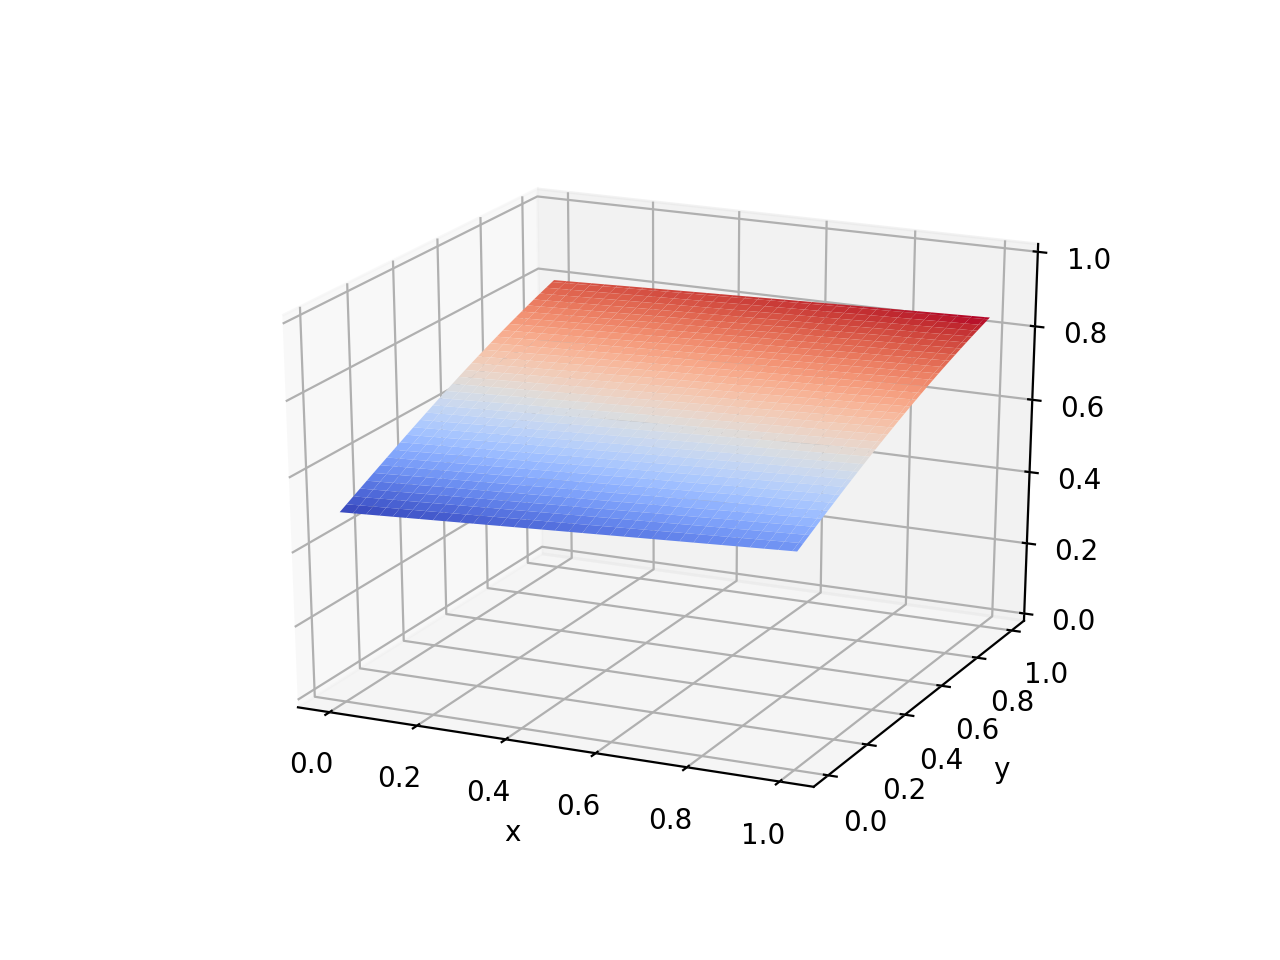

In [215]:
d_x=0.01

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(0, 1+d_x, d_x)
X, Y = np.meshgrid(x, y)

zs = np.array([sig(z(x,y,test.p))[0] for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlim(0,1)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

plt.show()

In [152]:
test.p[0][0] -= test.lr * dw0
test.p[0][1] -= test.lr * dw1
test.p[1] -= test.lr * du
test.p[2] -= test.lr * dv

In [153]:
dw0,dw1,du,dv = get_gradients(test.points, test.p, test.pLap, test.dOmega)

In [155]:
print(dw0)
print(dw1)
print(du)
print(dv)

0.15690850685174879
0.13823891734543758
0.2645514004468145
-10.294249027443614


In [125]:
N(0,0,test.p)

-6.4280021696709655

In [167]:
test.lr = 10

In [102]:
len(test.relative_norm)

1306

In [117]:
np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
test.save_result()

# Graphs

In [133]:
%matplotlib notebook
%matplotlib notebook

## Error vs Iterations

In [134]:
def plot_cost(err_rate, min_it=0, max_it=None, title=None):
    plt.figure()
    plt.gca().ticklabel_format(useOffset=False)
    plt.gca().set_xlabel('Iterations')
#     plt.gca().set_ylabel('Cost')
    plt.plot(np.arange(len(err_rate[min_it:max_it])), np.array(err_rate[min_it:max_it]))
    plt.title(title)
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

<IPython.core.display.Javascript object>


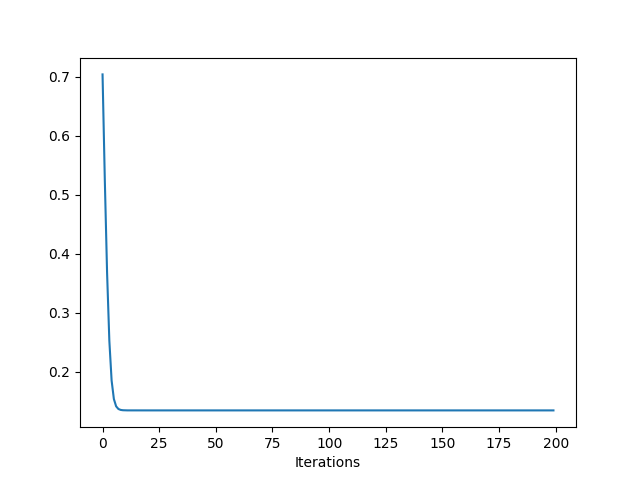

In [135]:
plot_cost(test.relative_norm, 1, 20000)

## Solution Accuracy on the domain

<IPython.core.display.Javascript object>


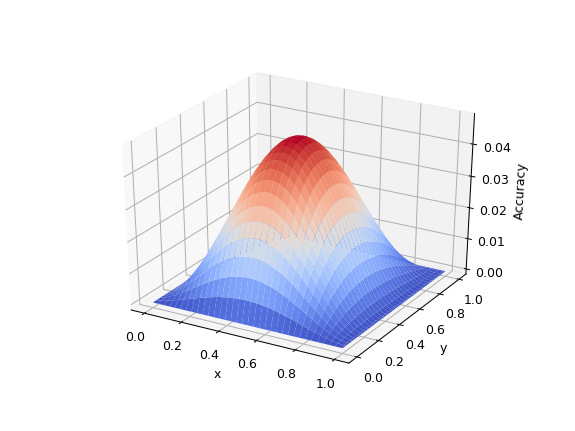

In [178]:
d_x=0.01

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(0, 1+d_x, d_x)
X, Y = np.meshgrid(x, y)

zs = np.array([psi_a(x,y) - psi_t(x,y,test.p) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
# ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0), useOffset=True)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Accuracy')

# plt.title(r"$\frac{\partial \Psi_a}{\partial y} - \frac{\partial \Psi_t}{\partial y}$")

plt.show()

<IPython.core.display.Javascript object>


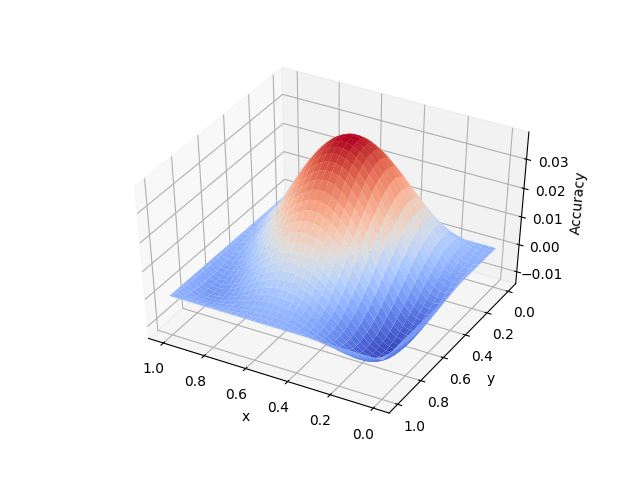

In [141]:
d_x=0.01

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(0, 1+d_x, d_x)
X, Y = np.meshgrid(x, y)

zs = np.array([psi_a(x,y) - psi_t(x,y,test.p) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
# ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0), useOffset=True)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Accuracy')

# plt.title(r"$\frac{\partial \Psi_a}{\partial y} - \frac{\partial \Psi_t}{\partial y}$")

plt.show()

<IPython.core.display.Javascript object>


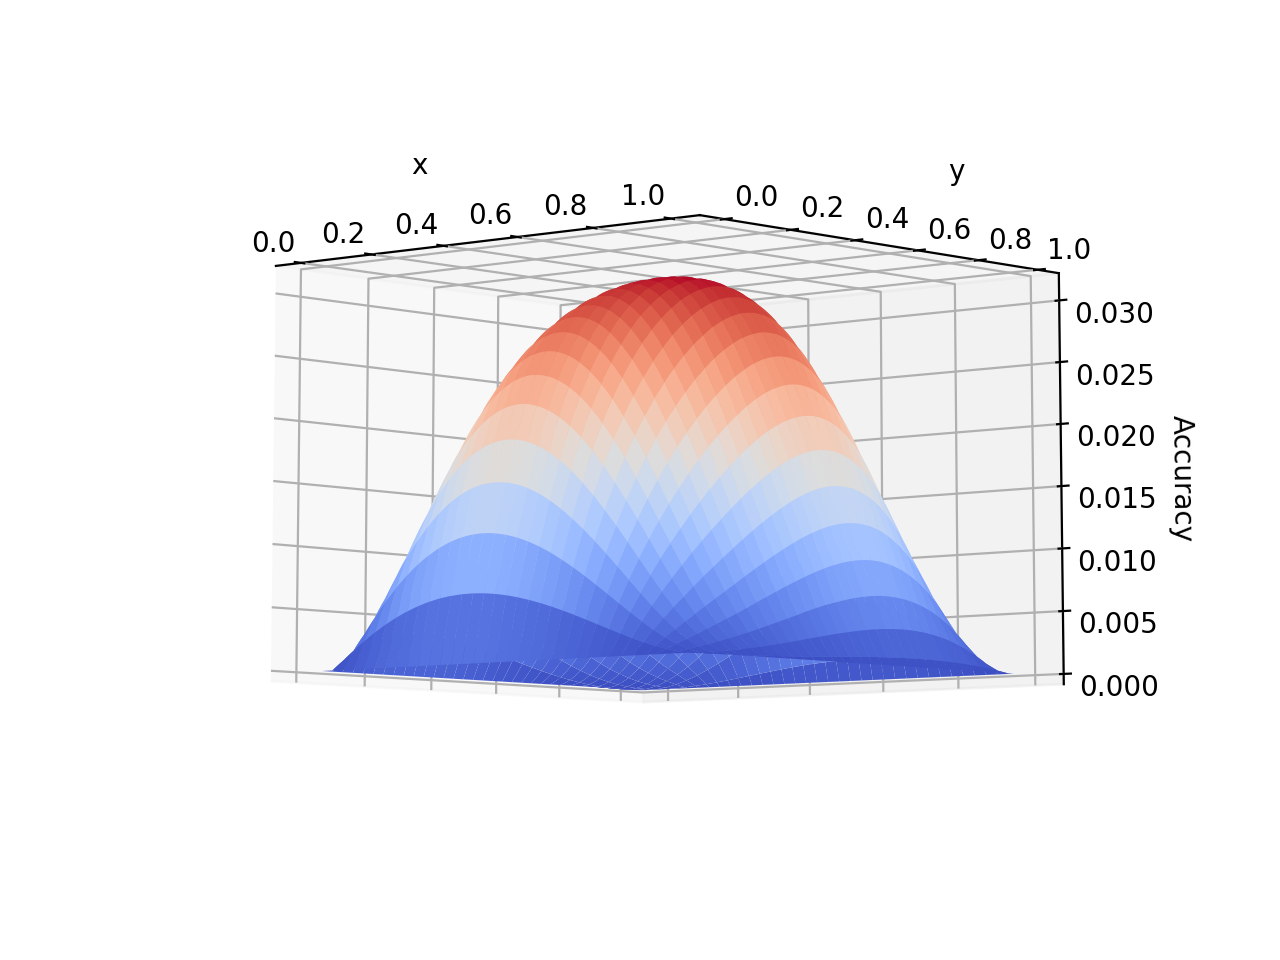

In [290]:
d_x=0.01

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(0, 1+d_x, d_x)
X, Y = np.meshgrid(x, y)

zs = np.array([psi_a(x,y) - psi_t(x,y,test.p) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
# ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0), useOffset=True)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Accuracy')

# plt.title(r"$\frac{\partial \Psi_a}{\partial y} - \frac{\partial \Psi_t}{\partial y}$")

plt.show()